# Defining functions

In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from specutils import Spectrum1D
import os
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table
from specutils.io.registers import custom_writer
from astropy.nddata import StdDevUncertainty

In [2]:
## Create a dataframe with the names and filepaths of input fits files
#Localpath gives the explict path of each file
#filename gives the filename of each file
def create_input(directory):
    #directory is the explicit path to the folder with the fits files that need conversion
    #example: '/Users/student/Desktop/Brown Dwarfs/DATA/'
    df = pd.DataFrame(columns=['Localpath', 'Filename']) #create empty dataframe
    for filename in os.listdir(directory): #iterate over fits files in location
        f = os.path.join(directory, filename)
        df = df.append({'Localpath':f, 'Filename':filename}, ignore_index=True)
        
    return df

In [3]:
def convert_files(input_dataframe, output_directory):
    #input_dataframe needs two columns: 'Localpath' and 'Filename', where localpath gives the explicit path and filename is the filename
    #output directory gives the explicit path to an empty output folder, eg: ''/Users/student/Desktop/Brown Dwarfs/DATA/correct'
    for file in input_dataframe['Localpath']: 
        try:
            with fits.open(file, ignore_missing_simple=True) as new_image:
                new_image_data = new_image[0].data #get image data
            if len(new_image_data.shape) == 3:
                new_image_data = new_image_data[0] #some fits files are a bit strange, and have shape (4,4,2037) instead of (4, 2307)
        
            flux = new_image_data[1]*u.Unit('erg / (AA cm2 s)') #NEEDS UNITS CHANGED! These are what I think the units are though
            wavelength = new_image_data[0]*u.micron #SAME
            error = new_image_data[2]
        
            try:
                spectrum = Spectrum1D(spectral_axis=wavelength, flux=flux, uncertainty=StdDevUncertainty(error)) #I don't think the error is in STD but this is the only thing that works
                #You can easily unwrap the actual error values from std
        
                filename = input_dataframe["Filename"][input_dataframe[input_dataframe['Localpath'] == file].index[0]]
                size = len(filename)
                mod_filename = filename[:size - 5] + "_fix.fits"
        
                new_filepath = output_directory + mod_filename
                
                try:
                    spectrum.write(new_filepath)
                    print(filename + " done!")
                except OSError:
                    filename = input_dataframe["Filename"][input_dataframe[input_dataframe['Localpath'] == file].index[0]]
                    print (filename + " OS error")
            
            except ValueError:
                filename = input_dataframe["Filename"][input_dataframe[input_dataframe['Localpath'] == file].index[0]]
                print (filename + " value error")
        except OSError:
            filename = input_dataframe["Filename"][input_dataframe[input_dataframe['Localpath'] == file].index[0]]
            print (filename + " OS error") #just in case it has a weird error
            
        
            

# Running a Test

In [4]:
data_files = create_input('/Users/student/Desktop/Brown Dwarfs/DATA/')

/var/folders/jw/wrlk7qnn5bb8wlvjjn9tf_k40000gr/T/ipykernel_98274/3950522336.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Localpath':f, 'Filename':filename}, ignore_index=True)
/var/folders/jw/wrlk7qnn5bb8wlvjjn9tf_k40000gr/T/ipykernel_98274/3950522336.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Localpath':f, 'Filename':filename}, ignore_index=True)
/var/folders/jw/wrlk7qnn5bb8wlvjjn9tf_k40000gr/T/ipykernel_98274/3950522336.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Localpath':f, 'Filename':filename}, ignore_index=True)
/var/folders/jw/wrlk7qnn5bb8wlvjjn9tf_k40000gr/T/ipykernel_98274/3950522336.py:10: FutureWarning: The frame.append method is depre

In [5]:
data_files

,Localpath,Filename
0,/Users/student/Desktop/Brown Dwarfs/DATA/mnire...,mnires_J0355+4525_20191028.fits
1,/Users/student/Desktop/Brown Dwarfs/DATA/nires...,nires_J0335-4439_20191219.fits
2,/Users/student/Desktop/Brown Dwarfs/DATA/mnire...,mnires_G192-8A_20210224.fits
3,/Users/student/Desktop/Brown Dwarfs/DATA/mnire...,mnires_J1556+7343_20210721.fits
4,/Users/student/Desktop/Brown Dwarfs/DATA/mnire...,mnires_J1710+4537_20220611.fits
...,...,...
162,/Users/student/Desktop/Brown Dwarfs/DATA/mnire...,mnires_J0335-4439_20191219.fits
163,/Users/student/Desktop/Brown Dwarfs/DATA/nires...,nires_J0355+4525_20191028.fits
164,/Users/student/Desktop/Brown Dwarfs/DATA/nires...,nires_J1556+7343_20210721.fits
165,/Users/student/Desktop/Brown Dwarfs/DATA/nires...,nires_J1710+4537_20220611.fits


In [6]:
convert_files(data_files, '/Users/student/Desktop/Brown Dwarfs/Output/')

mnires_J0355+4525_20191028.fits OS error
nires_J0335-4439_20191219.fits OS error
mnires_G192-8A_20210224.fits OS error
mnires_J1556+7343_20210721.fits OS error
mnires_J1710+4537_20220611.fits OS error
nires_J1023+2215_20220123.fits OS error
nires_J0433+1009_20191219.fits OS error
mnires_J1655-4217_20220611.fits OS error
mnires_J0640-2352_20181027.fits OS error
nires_J2002-2039_20201022.fits OS error
nires_J1416+2322_20200720.fits OS error
nires_J0055+5947_20191028.fits OS error
nires_J2112+0529_20220611.fits OS error
nires_J1701-3630_20220611.fits OS error
mnires_J0048+2508A_20191219.fits OS error
mnires_GJ576B_20220611.fits OS error
nires_J0048+2508A_20191219.fits OS error
mnires_J1625+7749_20210721.fits OS error
nires_J0758+5711_20210224.fits OS error
mnires_J1304+2819_20220711.fits OS error
nires_J2013-0326_20210823.fits OS error
nires_J1401+4325_20220123.fits OS error
nires_J1639-3401_20200720.fits OS error
mnires_J0048+2508B_20191219.fits OS error


    Header size is not multiple of 2880: 22532
There may be extra bytes after the last HDU or the file is corrupted. [astropy.io.fits.hdu.hdulist]


.DS_Store OS error
mnires_J1023+2215-background_20220123.fits OS error
mnires_J0140+0150_20210102.fits OS error
nires_J0048+2508B_20191219.fits OS error
mnires_J0724+4307_20190214.fits OS error
mnires_J2034+4708_20220711.fits OS error
mnires_J1209-1004_20220611.fits OS error
mnires_G192-8B_20210224.fits OS error
nires_J2218+1146_20200707.fits OS error
nires_J2138-3138_20191028.fits OS error
mnires_J1204-2359_20220119.fits OS error
nires_J0645-0302_20210102.fits OS error
mnires_J0743+3146_20210224.fits OS error
nires_J2243-1606_20201022.fits OS error
mnires_J2158-1550_20220611.fits OS error
nires_J1757+1142_20210721.fits OS error
nires_J1055+5443_20210224.fits OS error
mnires_J0559-3842_20210224.fits OS error
mnires_J1801+4717_20210823.fits OS error
nires_J0617+1945AB_20210102.fits OS error
nires_J0825-0210B_20191028.fits OS error
mnires_J0825-0210B_20191028.fits OS error
nires_J0627+0143_20220123.fits OS error
mnires_J2331-0504_20201022.fits OS error
nires_J0341+4715_20210102.fits OS e

# Testing that it works

In [7]:
from specutils import Spectrum1D

In [8]:
spec = Spectrum1D.read("/Users/student/Desktop/Brown Dwarfs/Output/nires_J1710+4537_20220611_fix.fits") 
#you can input any fixed file here

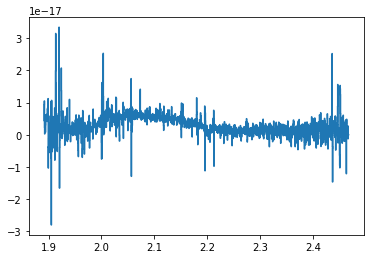

In [9]:
plt.step(spec.spectral_axis, spec.flux)  

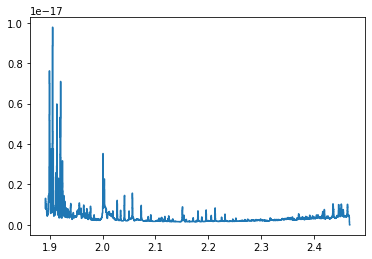

In [10]:
plt.step(spec.spectral_axis, spec.uncertainty.array)